In [1134]:
import pandas as pd
import astropy
from astropy.coordinates import SkyCoord
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np


# File: ReadFile.py

# Description: a notebook that reads in bsc5.csv and cleans the data and then using certain fields creates plots of the sky using both equatorial and galactic coordinates.

# Name: Aayush Singh

# UT EID: as92488

# Date: 9/22/2023

In [1135]:
header = ['HR', 'Name', 'HH', 'MM', 'SS', '+/-', 'DEd', 'DEm', 'DEs', 'Sptype', 'NoteFlag', '']
def stripped(df):
    return df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

df = pd.read_csv('bsc5.csv', index_col=0, names = header)

df['HH'] = df['HH'].replace('  ', pd.NA)
df['MM'] = df['MM'].replace('  ', pd.NA)
df['SS'] = df['SS'].replace('  ', pd.NA)
df['DEd'] = df['DEd'].replace('  ', pd.NA)
df['DEm'] = df['DEm'].replace('  ', pd.NA)
df['DEs'] = df['DEs'].replace('  ', pd.NA)




df = stripped(df)


df['HH'] = pd.to_numeric(df['HH'], errors='coerce')
df['MM'] = pd.to_numeric(df['MM'], errors='coerce')
df['SS'] = pd.to_numeric(df['SS'], errors='coerce')

df['DEd'] = pd.to_numeric(df['DEd'], errors='coerce')
df['DEm'] = pd.to_numeric(df['DEm'], errors='coerce')
df['DEs'] = pd.to_numeric(df['DEs'], errors='coerce')

#df.columns = header
#new_df = df.reset_index(drop=False)








In [1136]:
df.shape


(9110, 11)

In [1137]:
df.head(183)


,Name,HH,MM,SS,+/-,DEd,DEm,DEs,Sptype,NoteFlag,
HR,,,,,,,,,,,
1,,0.0,5.0,9.9,+,45.0,13.0,45.0,A1Vn,NaN,NaN
2,,0.0,5.0,3.8,-,0.0,30.0,11.0,gG9,NaN,NaN
3,33 Psc,0.0,5.0,20.1,-,5.0,42.0,27.0,K0IIIbCN-0.5,*,NaN
4,86 Peg,0.0,5.0,42.0,+,13.0,23.0,46.0,G5III,NaN,NaN
5,,0.0,6.0,16.0,+,58.0,26.0,12.0,G5V,*,NaN
...,...,...,...,...,...,...,...,...,...,...,...
179,19Xi Cas,0.0,42.0,3.9,+,50.0,30.0,45.0,B2V,*,NaN
180,Mu Phe,0.0,41.0,19.6,-,46.0,5.0,6.0,G8III,*,NaN
181,,0.0,42.0,31.1,+,58.0,45.0,12.0,B9.5III,NaN,NaN


In [1138]:
df.tail(5)


,Name,HH,MM,SS,+/-,DEd,DEm,DEs,Sptype,NoteFlag,
HR,,,,,,,,,,,
9106,,0.0,4.0,30.7,-,72.0,53.0,52.0,F2V,NaN,NaN
9107,,0.0,4.0,53.8,+,34.0,39.0,35.0,G2V,NaN,NaN
9108,,0.0,4.0,41.3,-,71.0,26.0,13.0,B8IV-V,NaN,NaN
9109,,0.0,4.0,56.0,+,26.0,38.0,56.0,K4IIIb,NaN,NaN
9110,,0.0,5.0,6.2,+,61.0,18.0,51.0,B8IVpHgMn,*,NaN


In [1139]:
df.describe()


,HH,MM,SS,DEd,DEm,DEs,
count,9096.000000,9096.000000,9096.000000,9096.000000,9096.000000,9096.000000,0.0
mean,11.547274,29.765501,30.171284,33.916996,29.692062,29.641931,NaN
std,6.790622,17.197686,17.249091,21.235014,17.271153,17.368593,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,6.000000,15.000000,15.700000,16.000000,15.000000,15.000000,NaN
50%,11.000000,30.000000,30.400000,33.000000,30.000000,30.000000,NaN
75%,18.000000,45.000000,44.900000,50.000000,45.000000,45.000000,NaN
max,23.000000,59.000000,59.900000,89.000000,59.000000,59.000000,NaN


In [1140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9110 entries, 1 to 9110
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      9110 non-null   object 
 1   HH        9096 non-null   float64
 2   MM        9096 non-null   float64
 3   SS        9096 non-null   float64
 4   +/-       9110 non-null   object 
 5   DEd       9096 non-null   float64
 6   DEm       9096 non-null   float64
 7   DEs       9096 non-null   float64
 8   Sptype    9110 non-null   object 
 9   NoteFlag  4477 non-null   object 
 10            0 non-null      float64
dtypes: float64(7), object(4)
memory usage: 854.1+ KB


In [1141]:
#RA  = HH + (MM/60) + (SS/3600)
#RA = 15*(RA)

#Dec  = (DEd)  + (DEm/60) +  (DEs/3600)



df['ra'] = ((df['HH']) + (df['MM']/60) + (df['SS']/3600)) *15


def Dec(line):
    if line['+/-'] == '-':
        return ((line['DEd'] + line['DEm']/60 + line['DEs']/3600)*(-1))
    else:
        return (line['DEd'] + line['DEm']/60 + line['DEs']/3600)
    
df['dec'] = df.apply(Dec, axis = 1)

print(df['ra'])
print(df['dec'])

HR
1       1.291250
2       1.265833
3       1.333750
4       1.425000
5       1.566667
          ...   
9106    1.127917
9107    1.224167
9108    1.172083
9109    1.233333
9110    1.275833
Name: ra, Length: 9110, dtype: float64
HR
1       45.229167
2       -0.503056
3       -5.707500
4       13.396111
5       58.436667
          ...    
9106   -72.897778
9107    34.659722
9108   -71.436944
9109    26.648889
9110    61.314167
Name: dec, Length: 9110, dtype: float64


In [1142]:
df.columns

Index(['Name', 'HH', 'MM', 'SS', '+/-', 'DEd', 'DEm', 'DEs', 'Sptype',
       'NoteFlag', '', 'ra', 'dec'],
      dtype='object')

In [1143]:
coordinates = SkyCoord(ra=df['ra'], dec=df['dec'], unit=(u.degree, u.degree), frame='icrs')

# Convert to Galactic coordinates (l and b)
df['long'] = coordinates.galactic.l
df['lat'] = coordinates.galactic.b

print(df['long'])
print(df['lat'])
df.columns


HR
1       114.444693
2        98.327548
3        93.754054
4       106.186519
5       117.034849
           ...    
9106    307.683600
9107    112.178545
9108    308.184072
9109    110.218378
9110    117.399966
Name: long, Length: 9110, dtype: float64
HR
1      -16.878664
2      -61.139797
3      -65.932554
4      -47.982971
5       -3.916934
          ...    
9106   -43.794916
9107   -27.238331
9108   -45.211544
9109   -35.072164
9110    -1.058921
Name: lat, Length: 9110, dtype: float64


Index(['Name', 'HH', 'MM', 'SS', '+/-', 'DEd', 'DEm', 'DEs', 'Sptype',
       'NoteFlag', '', 'ra', 'dec', 'long', 'lat'],
      dtype='object')

/Users/aayushsmac/miniconda3/envs/cs329e/lib/python3.11/site-packages/numpy/lib/function_base.py:3710: RuntimeWarning: invalid value encountered in divide
  return sin(y)/y


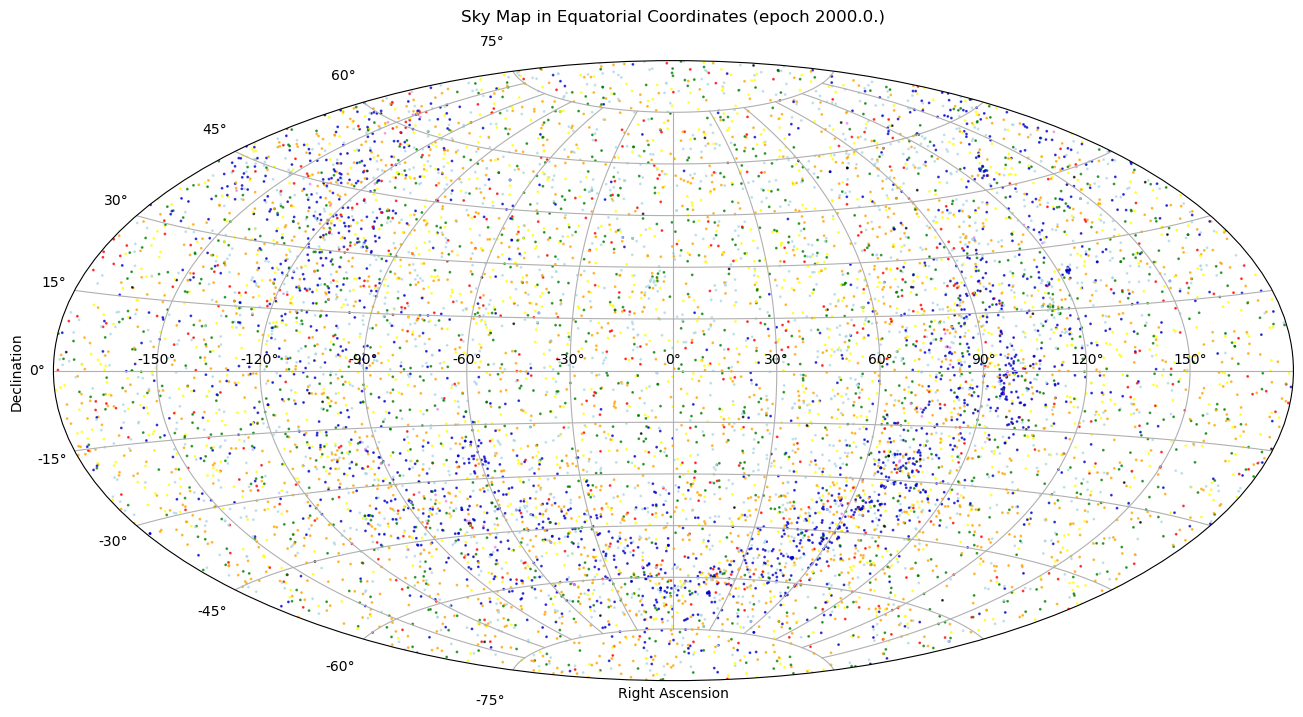

In [1144]:




long = np.radians(180 - df['ra'])
lat = np.radians(df['dec'])

def mapped(spectral):
    dict = {
    'O': 'violet',  # Violet or deep blue
    'B': 'mediumblue',  # Medium blue
    'A': 'lightblue',  # Light blue
    'F': 'green',  # Green
    'G': 'yellow',  # Yellow
    'K': 'orange',  # Orange
    'M': 'red'   # Red
    }
    
    if pd.isna(spectral) or not spectral.strip():
        return 'black'

    first_char = spectral.strip()[0].upper()
    
    return dict.get(first_char, 'black')


df ['StarColor'] = df ['Sptype'].apply(mapped)
StarColors = df['StarColor']

plt.figure(figsize= (16, 8.4))
ax = plt. subplot(111, projection = "aitoff")
plt.title("Sky Map in Equatorial Coordinates (epoch 2000.0.)", y = 1.05)
ax.set_xlabel( 'Right Ascension')
ax.set_ylabel( 'Declination')
plt.scatter(long, lat, marker='o', s=1, alpha = 0.7, color = df['StarColor'])
plt.grid(True)
plt. show()

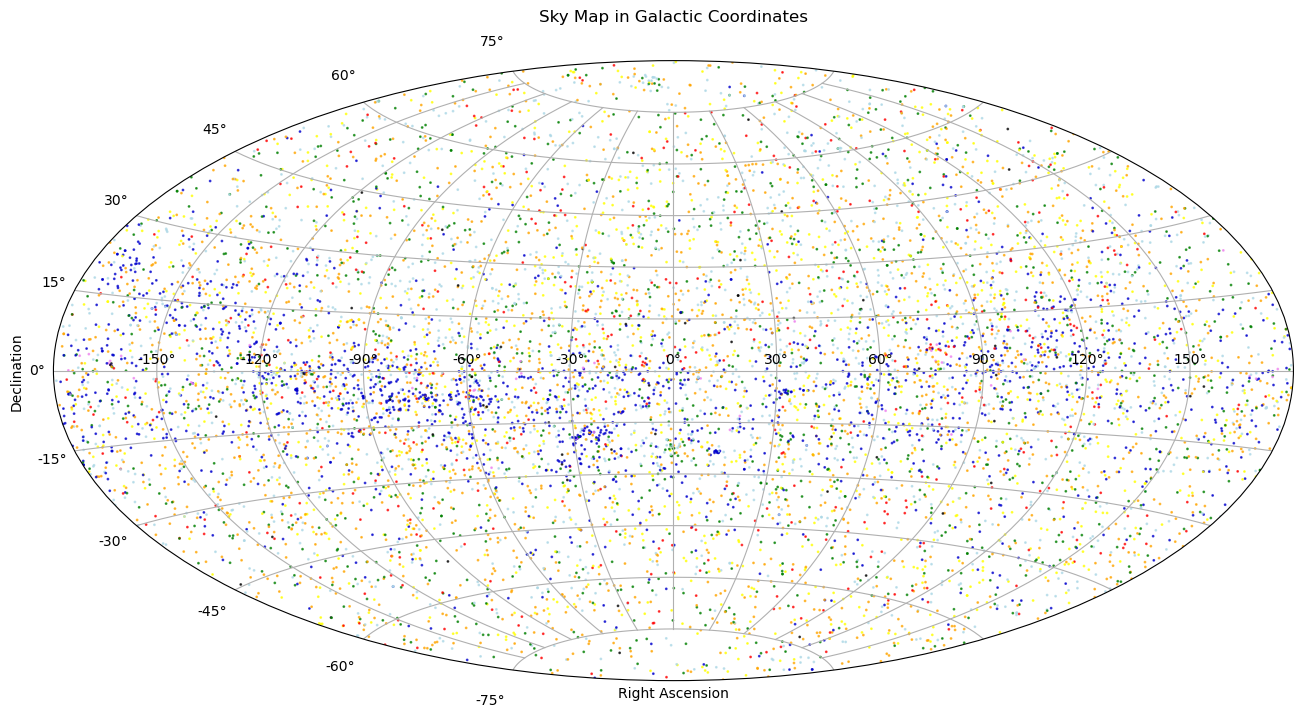

In [1145]:
longitude = np. radians (180 - coordinates.galactic.l.deg)
latitude = np. radians (coordinates.galactic.b.deg)



plt. figure(figsize = (16, 8.4))
ax = plt.subplot(111, projection = "aitoff")
plt.title("Sky Map in Galactic Coordinates", y = 1.05)
ax. set_xlabel('Right Ascension')
ax. set_ylabel('Declination')


plt.scatter(longitude, latitude, marker ='o', s=1, alpha= 0.7, color = df ['StarColor'])
plt.grid(True)